# Data Augmentation

One of the challenges of applying deep learning in the medical field is the scarcity of labelled datasets. Data augmentation is a technique that helps coping with this problem.

The goals of this tutorial is:
 - Illustrate data augmentation using the Keras API. 

In [1]:
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pylab as plt
# load data
import numpy as np
from scipy.misc import imread, imsave
from skimage.morphology import binary_erosion, binary_dilation

import sys
MY_UTILS_PATH = '../Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import ipt_utils


Bad key "ckend" on line 1 in
/Users/robertosouza/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/Users/robertosouza/Documents/virtualenv/venv03/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/Users/robertosouza/Documents/virtualenv/venv03/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/robertosouza/Documents/virtualenv/venv03/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


0


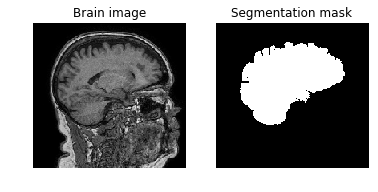

In [2]:
#Loading sample image and its mask
sample_brain = imread("../Data/brain_slice.png") 
sample_mask = imread("../Data/brain_slice_mask.png")

print sample_brain[25,25]
#Displaying image and its mask
plt.subplot(121)
plt.title("Brain image")
plt.imshow(sample_brain,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(sample_mask,cmap = "gray")
plt.axis("off")
plt.title("Segmentation mask")
plt.show()   

In [3]:
seed = 15 #random number generator seed

# Putting arrays in (nsamples,H,W,nchannels) convention
patches = sample_brain[np.newaxis,:,:,np.newaxis]
labels = sample_mask[np.newaxis,:,:,np.newaxis]
#Creating image data generator objects
image_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='constant',
        cval = 0)

mask_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='constant',
        cval = 0)


# Fitting them. Notice that the seed parameter synchronize them
image_datagen.fit(patches, augment=True, seed=seed)
mask_datagen.fit(labels, augment=True, seed=seed)

image_generator = image_datagen.flow(patches,batch_size = 1,seed = seed)
mask_generator = mask_datagen.flow(labels,batch_size = 1,seed = seed)


# function to merge generators
def combine_generator(gen1, gen2):
    while True:
        yield(gen1.next(), gen2.next())

# combine generators into one which yields image and masks
combined = combine_generator(image_generator, mask_generator)

i = 0
imgs = np.zeros((12,patches.shape[1],patches.shape[2]),dtype = np.uint8)
masks = np.zeros((12,patches.shape[1],patches.shape[2]),dtype = bool)
nsamples = 12

for ii in combined:
    img = ii[0][0,:,:,0]
    #img = 1.0*(img-img.min())/(img.max()-img.min())
    #img = (img*255).astype(np.uint8)
    mask = ii[1][0,:,:,0] > 0
    mask = np.logical_xor(binary_dilation(mask),binary_erosion(mask))
    imgs[i] = img
    masks[i] = mask    
    i+=1
    if i >= nsamples:
        break

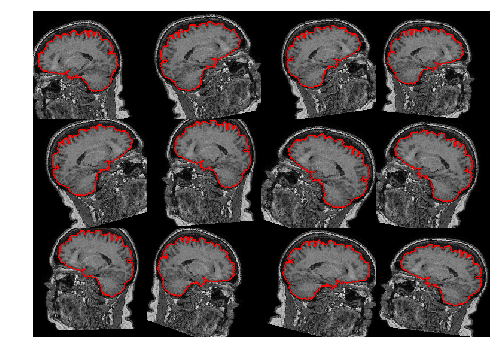

In [4]:
#Displaying data augmented dataset
img_overlaid = ipt_utils.gshow(ipt_utils.mosaic(imgs,4),\
                               ipt_utils.mosaic(masks,4))
plt.figure(figsize=(12,6))
plt.imshow(img_overlaid,cmap = "gray")
plt.axis("off")
plt.show()  